***
# Insulin Project

# Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil import parser
import seaborn as sns
from datetime import timedelta

***
# Loading the data


In [4]:
import os
os.getcwd()

'/Users/bielcanterapotente/Desktop/Big Data Analysis/Final Project'

In [5]:
# Read excel file
original_treatments = pd.read_excel('/Users/bielcanterapotente/Desktop/Big Data Analysis/Final Project/original_treatments_mongoDB.xlsx')
cgm = pd.read_csv('/Users/bielcanterapotente/Desktop/Big Data Analysis/Final Project/original_sgv.csv', sep=';')

# Drop column in sgm direction

***
# Orginal treatments dataset

original_treatments dataset contains the following columns:

In [6]:
original_treatments.head()

,created_at,eventType,carbs,insulin,duration,percent,glucose,absolute,notes
0,2019-05-07 13:40:08,Correction Bolus,NaN,1.0,NaN,NaN,165.0,NaN,NaN
1,2019-05-03 11:18:45,Correction Bolus,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2019-05-16 09:22:29,BG Check,NaN,NaN,NaN,NaN,127.0,NaN,NaN
3,2019-05-15 22:08:15,BG Check,NaN,NaN,NaN,NaN,144.0,NaN,NaN
4,2019-05-03 12:13:35,BG Check,NaN,NaN,NaN,NaN,104.0,NaN,NaN


#### We can see that in the dataset we have a lot of missing value in columns like: 'carbs', 'insulin', 'duration', 'percent'

In [7]:
original_treatments.columns

Index(['created_at', 'eventType', 'carbs', 'insulin', 'duration', 'percent',
       'glucose', 'absolute', 'notes'],
      dtype='object')

- `created_at`: The date and time the event occurred
- `eventType`: The type of event that occurred
- `carbs`: The amount of carbohydrates consumed by the patient
- `insulin`: The amount of insulin injected by the patient at a given time
- `duration`: The duration of the insulin injection
- `percent`: The percentage of the insulin injected
- `glucose`: The glucose level of the patient
- `absolute`: The absolute value of the glucose level
- `notes`: Additional information about the event a lot of missing values and unstructured data not ready for analysis

In [8]:
original_treatments.shape

(25470, 9)

#### The dataset contains 25470 rows and 9 columns

In [9]:
# Check the na values
original_treatments.isnull().sum()

created_at      996
eventType         5
carbs         21833
insulin       21320
duration      20647
percent       21089
glucose        5622
absolute      25183
notes         24761
dtype: int64

In [11]:
# Check the perentage of missing values in each column in the dataset
original_treatments.isnull().mean()

created_at    0.039105
eventType     0.000196
carbs         0.857205
insulin       0.837063
duration      0.810640
percent       0.827994
glucose       0.220730
absolute      0.988732
notes         0.972163
dtype: float64

#### In the dataset we have a lot of missing values in columns like: 'carbs', 'insulin', 'duration', 'percent'. We can see that there are 6 out 9 columns that have more than 80% missing values.

In [12]:
original_treatments.dtypes

created_at    datetime64[ns]
eventType             object
carbs                float64
insulin              float64
duration             float64
percent              float64
glucose              float64
absolute             float64
notes                 object
dtype: object

***
# CGM dataset

In [13]:
cgm.head()

,date,dateString,direction,sgv,type
0,"1,55999E+24",Sat Jun 08 12:34:41 GMT+02:00 2019,Flat,154,sgv
1,"1,55999E+24",Sat Jun 08 12:39:42 GMT+02:00 2019,Flat,156,sgv
2,"1,55999E+22",Sat Jun 08 12:44:42 GMT+02:00 2019,Flat,155,sgv
3,"1,55999E+24",Sat Jun 08 12:49:42 GMT+02:00 2019,Flat,154,sgv
4,"1,55999E+24",Sat Jun 08 12:54:41 GMT+02:00 2019,Flat,156,sgv


#### The dataset contains the following columns:

In [14]:
cgm.columns

Index(['date', 'dateString', 'direction', 'sgv', 'type'], dtype='object')

- `date` & `dateString`: The date and time the event occurred
- `direction`: The direction of the glucose level`
- `sgv`: The glucose level of the patient
- `type`: The type of event that occurred

In [78]:
cgm.shape

(31566, 5)

#### The dataset contains 31566 rows and 5 columns. The size of the dataset is bigger than the original_treatments dataset. This is can be probably because the original_treatments dataset contains only the events that occured.

In [15]:
# Check the na values
cgm.isnull().sum()

date              0
dateString        0
direction     13962
sgv               0
type              0
dtype: int64

#### The dataset contains missing values only in direction column which is good, because we don't need it for the modeling.

In [80]:
cgm.dtypes

date          object
dateString    object
direction     object
sgv            int64
type          object
dtype: object

***
# Handle Wrong Data Types

In [16]:
# Function to parse multiple date formats
## Function definition
def parse_date(date_str):
    try:
        # ISO 8601 format
        if "T" in date_str and "Z" in date_str:
            return pd.to_datetime(date_str, format="%Y-%m-%dT%H:%M:%SZ", errors="coerce") # Accounting for  ISO 8601 format
        # Named timezone format (e.g., "Sat Jun 08 12:34:41 GMT+02:00 2019")
        ## Handling the named timezones properly
        elif "GMT" in date_str:
            clean_date_str = date_str.replace("GMT", "").strip()  # Remove "GMT"
            return parser.parse(clean_date_str)
        # Default fallback (try flexible parsing)
        return parser.parse(date_str)
    except Exception:
        return pd.NaT

# Apply the function to the `dateString` column
cgm['dateString'] = cgm['dateString'].apply(parse_date)

# Check results
print(f"Remaining missing dates: {cgm['dateString'].isna().sum()}")

Remaining missing dates: 0


In [17]:
# Standardize the `date` column by removing timezone from tz-aware rows
# 
cgm['dateString'] = cgm['dateString'].apply(
    lambda x: x.replace(tzinfo=None) if isinstance(x, datetime.datetime) and x.tzinfo else x
)

# Convert the `date` column to `datetime64[ns]`
cgm['dateString'] = pd.to_datetime(cgm['dateString'], errors='coerce')

# Verify the data types
print(cgm.dtypes)


date                  object
dateString    datetime64[ns]
direction             object
sgv                    int64
type                  object
dtype: object


In [83]:
cgm.shape

(31566, 5)

In [18]:
cgm.head()

,date,dateString,direction,sgv,type
0,"1,55999E+24",2019-06-08 12:34:41,Flat,154,sgv
1,"1,55999E+24",2019-06-08 12:39:42,Flat,156,sgv
2,"1,55999E+22",2019-06-08 12:44:42,Flat,155,sgv
3,"1,55999E+24",2019-06-08 12:49:42,Flat,154,sgv
4,"1,55999E+24",2019-06-08 12:54:41,Flat,156,sgv


In [19]:
# Check for NaT values
cgm['dateString'].isnull().sum()

0

In [20]:
cgm.dtypes

date                  object
dateString    datetime64[ns]
direction             object
sgv                    int64
type                  object
dtype: object

***
# Filling missing values

Insulin and Carbs are 0 because the patient is not eating or injecting insulin

In [21]:
# Fill missing values in `insulin` and  `carbs` columns with 0
original_treatments['insulin'].fillna(0, inplace=True)
original_treatments['carbs'].fillna(0, inplace=True)
# FIll the missing values in the duration column with 0
original_treatments['duration'].fillna(0, inplace=True)
# Fill missing percent values with default -100%
original_treatments['percent'].fillna(-100, inplace=True)


In [23]:
# Check the missing values in the dataset
original_treatments.isnull().sum()

created_at      996
eventType         5
carbs             0
insulin           0
duration          0
percent           0
glucose        5622
absolute      25183
notes         24761
dtype: int64

***
# Inspecting the datasets

In [24]:
# Sort the dataset by `date`
cgm = cgm.sort_values('dateString').reset_index(drop=True)
# Sort the dataset by `created_at`
original_treatments = original_treatments.sort_values('created_at').reset_index(drop=True)

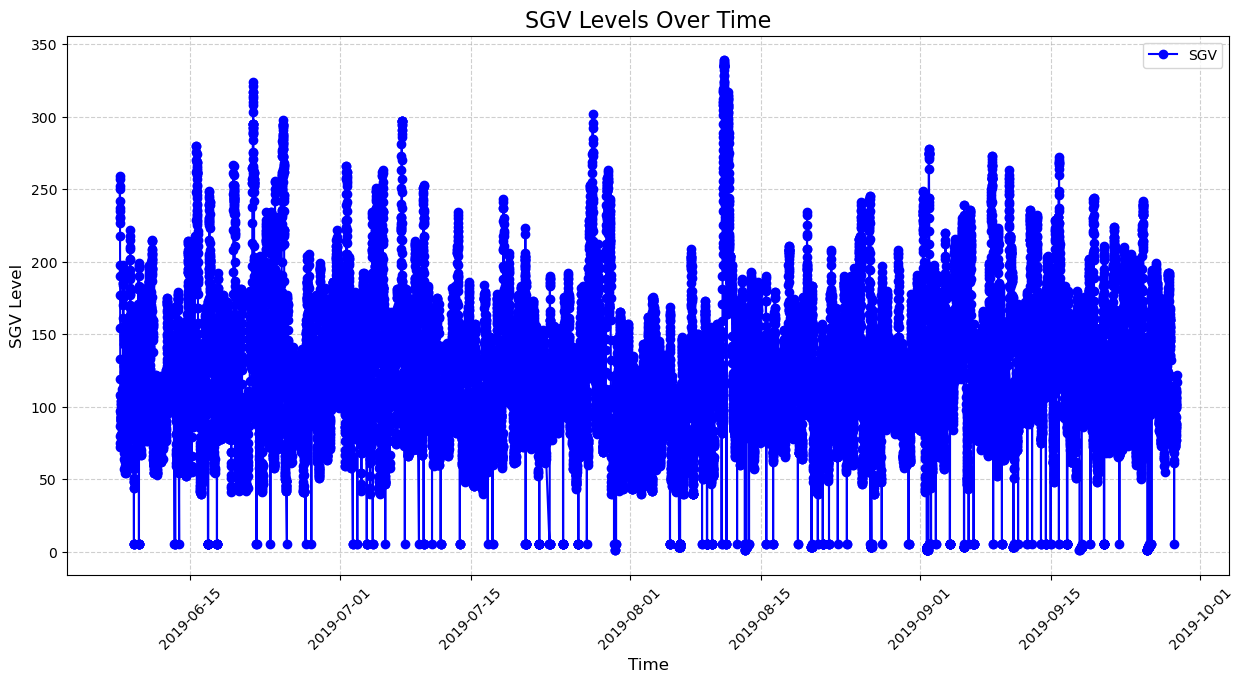

In [25]:
# Plot the distribution of sgv values over time with a line plot
plt.figure(figsize=(15, 7))
plt.plot(cgm['dateString'], cgm['sgv'], marker='o', color='blue', label='SGV')

# Add plot details
plt.title("SGV Levels Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("SGV Level", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

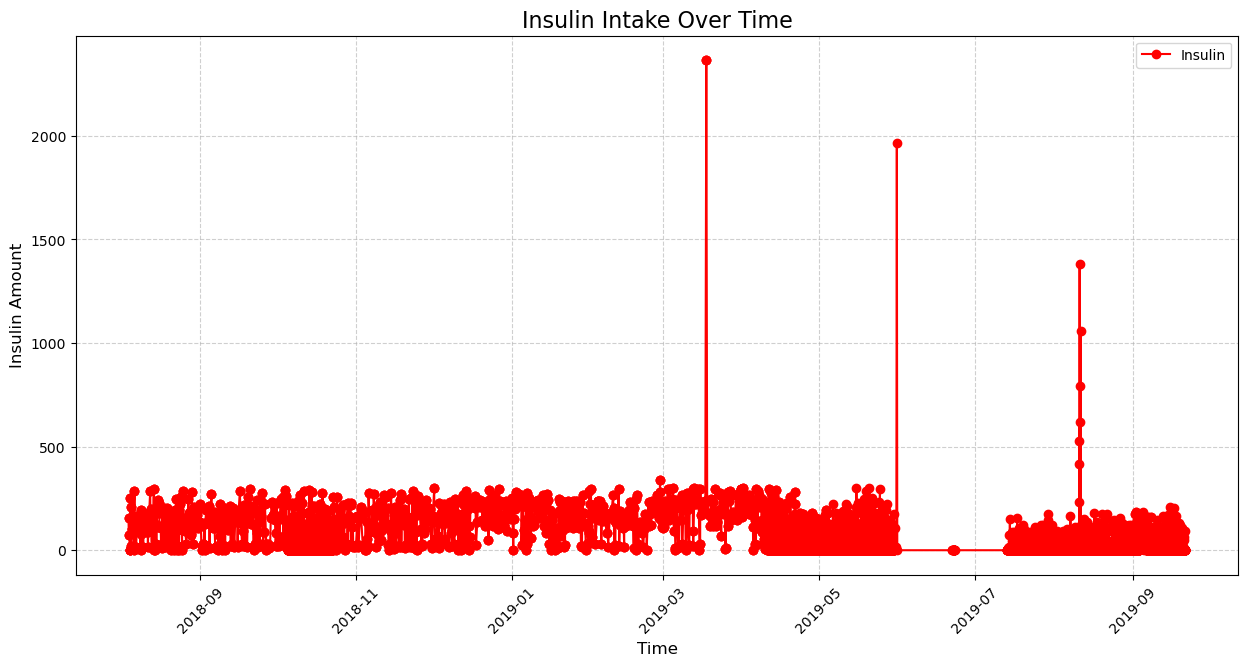

In [26]:
# Plot the distribution of insulin values over time with a line plot
plt.figure(figsize=(15, 7))
plt.plot(original_treatments['created_at'], original_treatments['insulin'], marker='o', color='red', label='Insulin')

# Add plot details
plt.title("Insulin Intake Over Time", fontsize=16) 
plt.xlabel("Time", fontsize=12)
plt.ylabel("Insulin Amount", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

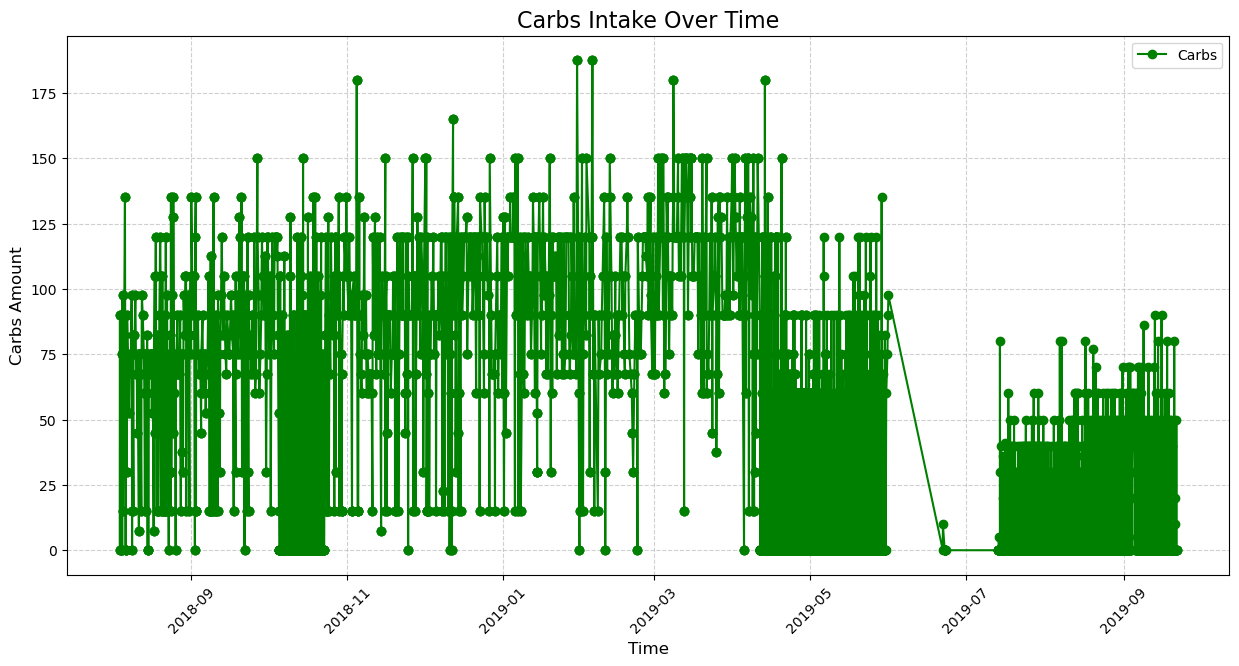

In [27]:
# Plot the distribution of carbs values over time with a line plot
plt.figure(figsize=(15, 7))
plt.plot(original_treatments['created_at'], original_treatments['carbs'], marker='o', color='green', label='Carbs')

# Add plot details
plt.title("Carbs Intake Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Carbs Amount", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

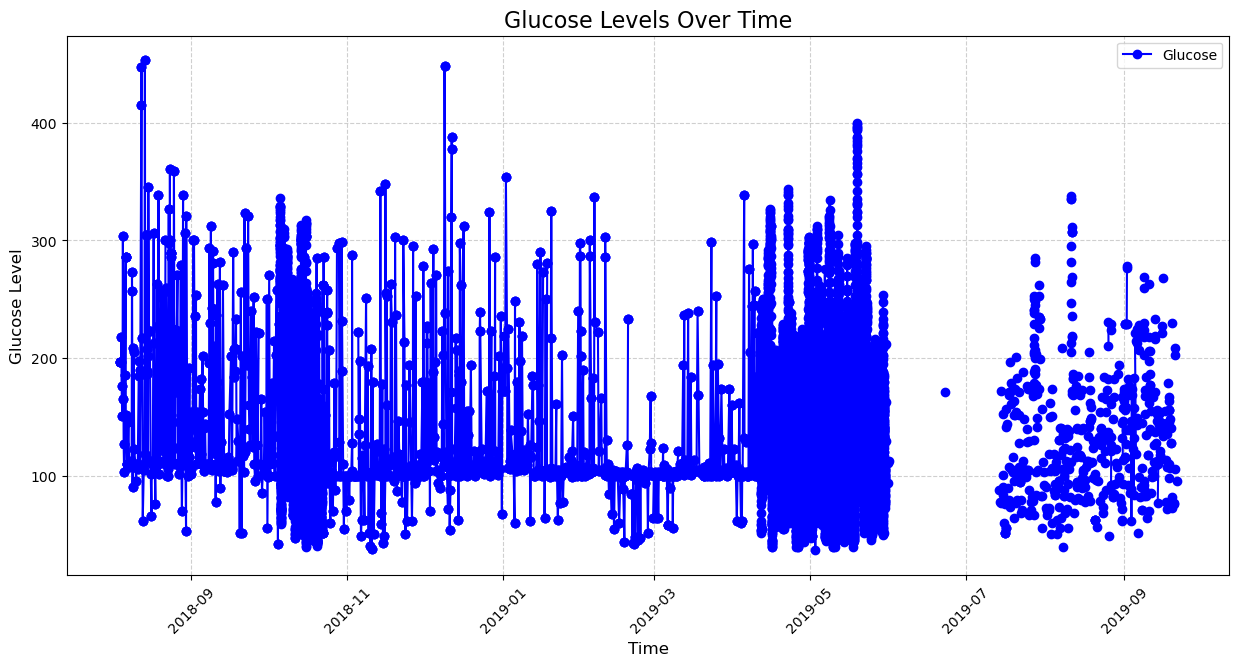

In [28]:
# Plot the distribution of glucose values over time with a line plot
plt.figure(figsize=(15, 7))
plt.plot(original_treatments['created_at'], original_treatments['glucose'], marker='o', color='blue', label='Glucose')

# Add plot details
plt.title("Glucose Levels Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Glucose Level", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
    
plt.legend()
plt.show()


***
# Investigation of the time columns in the datasets

In [29]:
# Check the time range in the datasets
print(f"Original Treatments: {original_treatments['created_at'].min()} - {original_treatments['created_at'].max()}")
print(f"CGM: {cgm['dateString'].min()} - {cgm['dateString'].max()}")

Original Treatments: 2018-08-03 22:38:58 - 2019-09-21 12:53:08
CGM: 2019-06-07 10:49:41 - 2019-09-28 11:06:15


- The CGM data covers only the last 3.5 months of the Original Treatments dataset.
- The earliest CGM record is 2019-06-07, while the Original Treatments dataset starts from 2018-08-03, indicating about 10 months of non-overlapping data at the beginning.

#### Orignial Treatments Time Intervals

In [95]:
# Step 1: Sort the dataset by `created_at`
original_treatments = original_treatments.sort_values('created_at').reset_index(drop=True)

# Step 2: Calculate time differences between consecutive records
original_treatments['time_diff'] = original_treatments['created_at'].diff()

# Step 3: Display summary statistics
print("Original Treatments Time Intervals (after sorting):")
print(original_treatments['time_diff'].describe())

# Step 4: Check for negative time differences (should not exist after sorting)
out_of_order_records = original_treatments[original_treatments['time_diff'] < pd.Timedelta(0)]
print(f"Number of out-of-order records after sorting: {len(out_of_order_records)}")
if not out_of_order_records.empty:
    print(out_of_order_records[['created_at', 'time_diff']].head())
else:
    print("No negative time differences detected!")


Original Treatments Time Intervals (after sorting):
count                        24473
mean     0 days 00:24:20.158133453
std      0 days 04:43:42.567043676
min                0 days 00:00:00
25%                0 days 00:05:00
50%                0 days 00:05:00
75%                0 days 00:07:05
max               21 days 07:05:38
Name: time_diff, dtype: object
Number of out-of-order records after sorting: 0
No negative time differences detected!


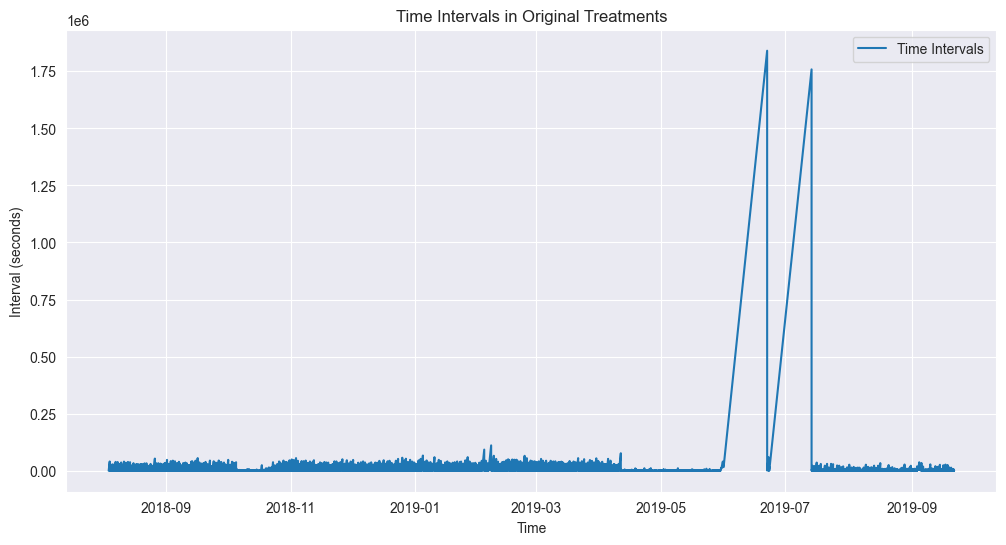

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(original_treatments['created_at'], original_treatments['time_diff'].dt.total_seconds(), label='Time Intervals')
plt.title("Time Intervals in Original Treatments")
plt.xlabel("Time")
plt.ylabel("Interval (seconds)")
plt.legend()
plt.show()

#### CGM Time Intervals

In [97]:
# Ensure 'date' column is in datetime64[ns]
cgm['date'] = pd.to_datetime(cgm['dateString'], errors='coerce')

# Sort the DataFrame by 'date'
cgm = cgm.sort_values('date').reset_index(drop=True)

# Calculate time differences
cgm['time_diff'] = cgm['date'].diff()

# Display summary statistics and a sample of intervals
time_diff_summary = cgm['time_diff'].describe()
sample_intervals = cgm[['date', 'time_diff']].head(10)

time_diff_summary, sample_intervals

(count                        31565
 mean     0 days 00:05:09.336100110
 std      0 days 00:05:54.911176053
 min                0 days 00:00:05
 25%                0 days 00:05:00
 50%                0 days 00:05:00
 75%                0 days 00:05:00
 max                0 days 09:04:01
 Name: time_diff, dtype: object,
                  date       time_diff
 0 2019-06-07 10:49:41             NaT
 1 2019-06-07 10:54:41 0 days 00:05:00
 2 2019-06-07 10:59:41 0 days 00:05:00
 3 2019-06-07 11:04:41 0 days 00:05:00
 4 2019-06-07 11:09:41 0 days 00:05:00
 5 2019-06-07 11:14:41 0 days 00:05:00
 6 2019-06-07 11:19:41 0 days 00:05:00
 7 2019-06-07 11:24:41 0 days 00:05:00
 8 2019-06-07 11:29:41 0 days 00:05:00
 9 2019-06-07 11:34:41 0 days 00:05:00)

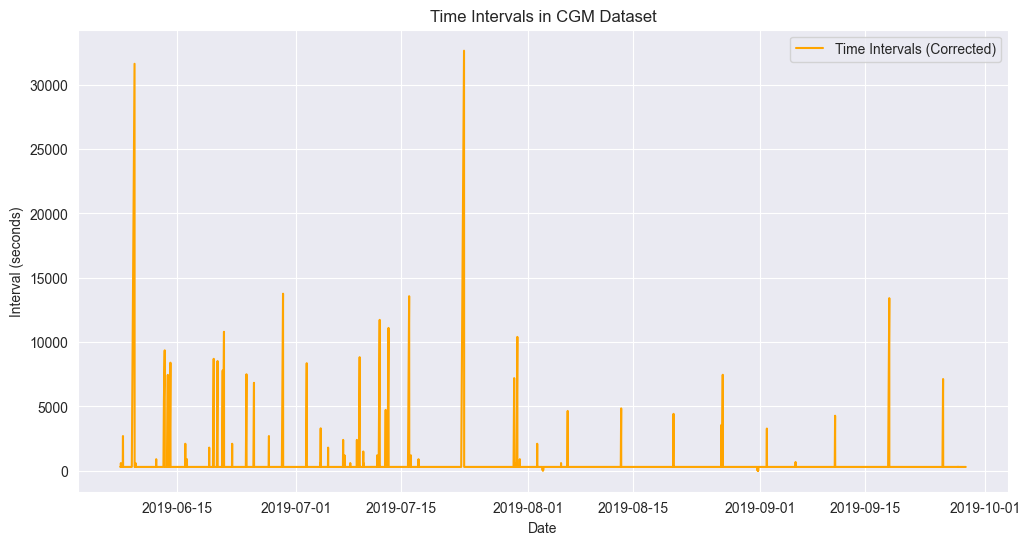

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(cgm['date'], cgm['time_diff'].dt.total_seconds(), label='Time Intervals (Corrected)', color='orange')
plt.title("Time Intervals in CGM Dataset")
plt.xlabel("Date")
plt.ylabel("Interval (seconds)")
plt.legend()
plt.show()

In [99]:
# Remove time differences columns from both datasets
original_treatments = original_treatments.drop(columns=['time_diff'], axis=1)
cgm = cgm.drop(columns=['time_diff'], axis=1)

In [100]:
cgm

,date,dateString,direction,sgv,type
0,2019-06-07 10:49:41,2019-06-07 10:49:41,NaN,230,sgv
1,2019-06-07 10:54:41,2019-06-07 10:54:41,NaN,227,sgv
2,2019-06-07 10:59:41,2019-06-07 10:59:41,NaN,235,sgv
3,2019-06-07 11:04:41,2019-06-07 11:04:41,NaN,252,sgv
4,2019-06-07 11:09:41,2019-06-07 11:09:41,NaN,257,sgv
...,...,...,...,...,...
31561,2019-09-28 10:46:15,2019-09-28 10:46:15,Flat,107,sgv
31562,2019-09-28 10:51:15,2019-09-28 10:51:15,Flat,109,sgv
31563,2019-09-28 10:56:15,2019-09-28 10:56:15,Flat,112,sgv
31564,2019-09-28 11:01:16,2019-09-28 11:01:16,Flat,117,sgv


***
# Merge the datasets

In [101]:
# Filter both dataset after 14/07/2019 1:20h
original_treatments = original_treatments[original_treatments['created_at'] >= pd.Timestamp('2019-07-14 01:20:00')]
cgm = cgm[cgm['date'] >= pd.Timestamp('2019-07-14 01:20:00')]

# Filter both datasets before 2019-09-21 12:53:08
original_treatments = original_treatments[original_treatments['created_at'] <= pd.Timestamp('2019-09-21 12:53:08')]
cgm = cgm[cgm['date'] <= pd.Timestamp('2019-09-21 12:53:08')]

# Display the shape 
print(f"Original Treatments: {original_treatments.shape}")
print(f"CGM: {cgm.shape}")

Original Treatments: (5227, 9)
CGM: (19688, 5)


In [102]:
# Perform the merging, keeping all CGM records
merged = pd.merge_asof(
    cgm.sort_values('date'),
    original_treatments.sort_values('created_at'),
    left_on='date',
    right_on='created_at',
    direction='backward'
)

# Combine the 'glucose' and 'sgv' columns into a single column
merged['glucose_combined'] = merged.apply(
    lambda row: row['glucose'] if pd.notna(row['glucose']) else row['sgv'], axis=1
)

# Drop the original 'glucose' and 'sgv' columns if they are no longer needed
merged = merged.drop(columns=['glucose', 'sgv'])

# Display the shape of the merged dataset and a sample
merged_shape = merged.shape
merged_sample = merged.head(10)

print(merged_shape)
merged_sample.head()


(19688, 13)


,date,dateString,direction,type,created_at,eventType,carbs,insulin,duration,percent,absolute,notes,glucose_combined
0,2019-07-14 01:24:38,2019-07-14 01:24:38,Flat,sgv,2019-07-14 01:20:51,Temp Basal,0.0,0.0,120.0,-100.0,NaN,NaN,70.0
1,2019-07-14 01:29:38,2019-07-14 01:29:38,Flat,sgv,2019-07-14 01:20:51,Temp Basal,0.0,0.0,120.0,-100.0,NaN,NaN,67.0
2,2019-07-14 01:34:38,2019-07-14 01:34:38,Flat,sgv,2019-07-14 01:20:51,Temp Basal,0.0,0.0,120.0,-100.0,NaN,NaN,65.0
3,2019-07-14 01:39:39,2019-07-14 01:39:39,Flat,sgv,2019-07-14 01:20:51,Temp Basal,0.0,0.0,120.0,-100.0,NaN,NaN,62.0
4,2019-07-14 01:44:38,2019-07-14 01:44:38,Flat,sgv,2019-07-14 01:20:51,Temp Basal,0.0,0.0,120.0,-100.0,NaN,NaN,61.0


We are merging on the cgm because it follows the patient during the whole day the treatments dataset is only when the patient is doing something. We are keeping all the cgm records and we are merging the treatments dataset on the cgm dataset.

In [103]:
# Verify the merge result
print(f"Merged Dataset Range: {merged['created_at'].min()} - {merged['created_at'].max()}")
print(f"Number of records: {len(merged)}")


Merged Dataset Range: 2019-07-14 01:20:51 - 2019-09-21 12:28:02
Number of records: 19688


In [104]:
# Check for missing values in the merged dataset
merged.isnull().sum()

date                    0
dateString              0
direction            9401
type                    0
created_at              0
eventType               0
carbs                   0
insulin                 0
duration                0
percent                 0
absolute            19679
notes               19649
glucose_combined        0
dtype: int64

In [105]:
merged.dtypes

date                datetime64[ns]
dateString          datetime64[ns]
direction                   object
type                        object
created_at          datetime64[ns]
eventType                   object
carbs                      float64
insulin                    float64
duration                   float64
percent                    float64
absolute                   float64
notes                       object
glucose_combined           float64
dtype: object

In [106]:
merged.shape

(19688, 13)

#### Removing Unnecessary Columns

In [107]:
# Drop unnecessary columns
columns_to_drop = ['date','notes','direction','type' ,'notes', 'absolute', 'created_at']
cleaned_data = merged.drop(columns=columns_to_drop, axis=1)

# Verify the remaining columns
print("Remaining columns after cleanup:")
print(cleaned_data.columns)

Remaining columns after cleanup:
Index(['dateString', 'eventType', 'carbs', 'insulin', 'duration', 'percent',
       'glucose_combined'],
      dtype='object')


***
# Get one specific date (14/07/2019) and plot the SGV evolution

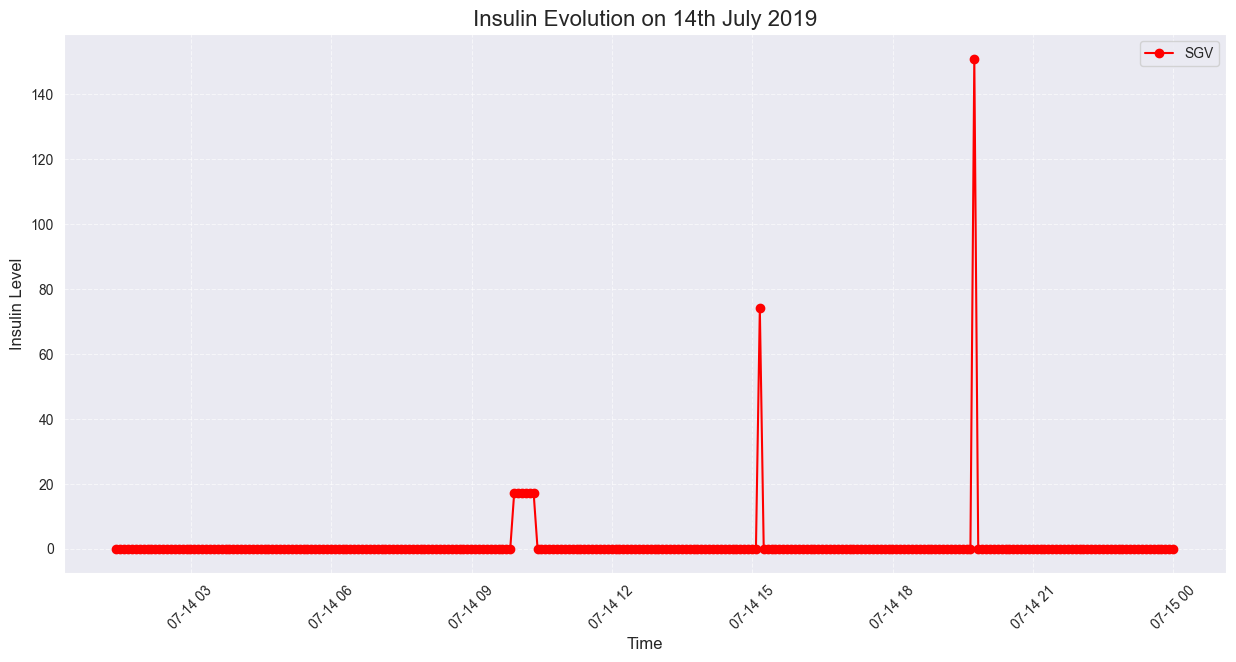

In [108]:
# Filter the merged dataset for 14th July 2019
specific_date = cleaned_data[(cleaned_data['dateString'].dt.date == pd.Timestamp('2019-07-14').date())]

# Plot the SGV evolution
plt.figure(figsize=(15, 7))
plt.plot(specific_date['dateString'], specific_date['insulin'], marker='o', color='red', label='SGV')

# Add plot details
plt.title("Insulin Evolution on 14th July 2019", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Insulin Level", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### There are 3 noteable peaks in the insulin levels on the 14th of July 2019, indicating significant insulin injections at those times. The other values are 0 or close to 0, suggesting no insulin injections at those times.

In [109]:
# Check the specific time of the peaks
specific_date[specific_date['insulin'] > 0]

,dateString,eventType,carbs,insulin,duration,percent,glucose_combined
102,2019-07-14 09:54:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
103,2019-07-14 09:59:41,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
104,2019-07-14 10:04:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
105,2019-07-14 10:09:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
106,2019-07-14 10:14:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
107,2019-07-14 10:19:41,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
165,2019-07-14 15:09:40,Bolus Wizard,30.0,74.0,0.0,-100.0,77.0
220,2019-07-14 19:44:40,Bolus Wizard,40.0,151.0,0.0,-100.0,172.0


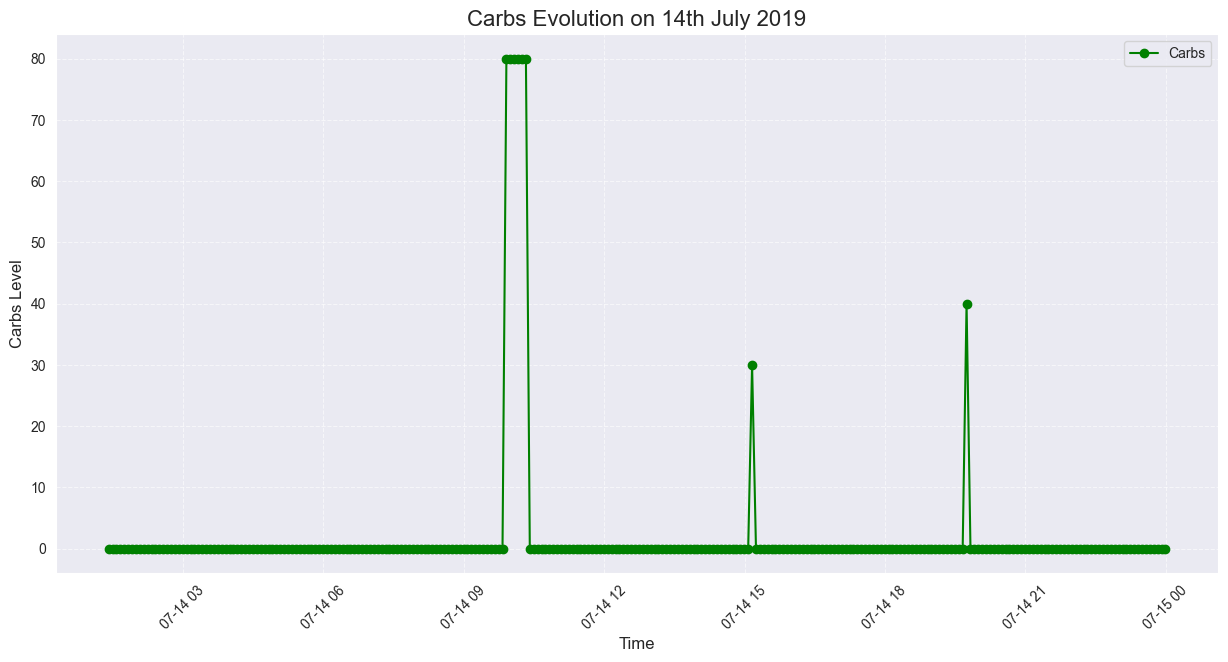

In [110]:
# PLot the carbs
plt.figure(figsize=(15, 7))
plt.plot(specific_date['dateString'], specific_date['carbs'], marker='o', color='green', label='Carbs')

# Add plot details
plt.title("Carbs Evolution on 14th July 2019", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Carbs Level", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### There are 3 noteable peaks in the carbs levels on the 14th of July 2019, indicating significant carb intake at those times. The other values are 0 or close to 0, suggesting no carb intake at those times. Probably the peaks in carbs and insulin are related, because the patient needs to inject insulin when he eats carbs.

In [111]:
# Check the peaks in carbs
specific_date[specific_date['carbs'] > 0]

,dateString,eventType,carbs,insulin,duration,percent,glucose_combined
102,2019-07-14 09:54:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
103,2019-07-14 09:59:41,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
104,2019-07-14 10:04:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
105,2019-07-14 10:09:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
106,2019-07-14 10:14:40,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
107,2019-07-14 10:19:41,Bolus Wizard,80.0,17.0,0.0,-100.0,78.0
165,2019-07-14 15:09:40,Bolus Wizard,30.0,74.0,0.0,-100.0,77.0
220,2019-07-14 19:44:40,Bolus Wizard,40.0,151.0,0.0,-100.0,172.0


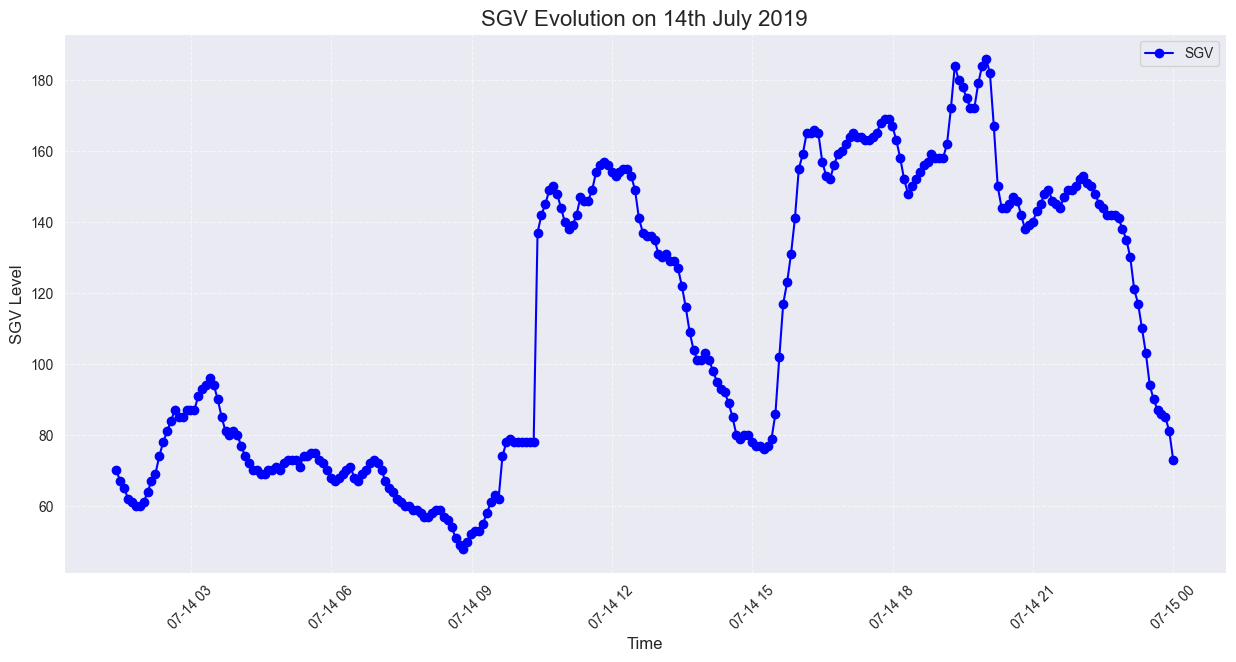

In [112]:
# Plot the SGV evolution
plt.figure(figsize=(15, 7))
plt.plot(specific_date['dateString'], specific_date['glucose_combined'], marker='o', color='blue', label='SGV')

# Add plot details
plt.title("SGV Evolution on 14th July 2019", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("SGV Level", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### SGV levels change a lot with notable peaks and downs on the 14th of July 2019. This indicates significant fluctuations in the patient's glucose levels throughout the day.

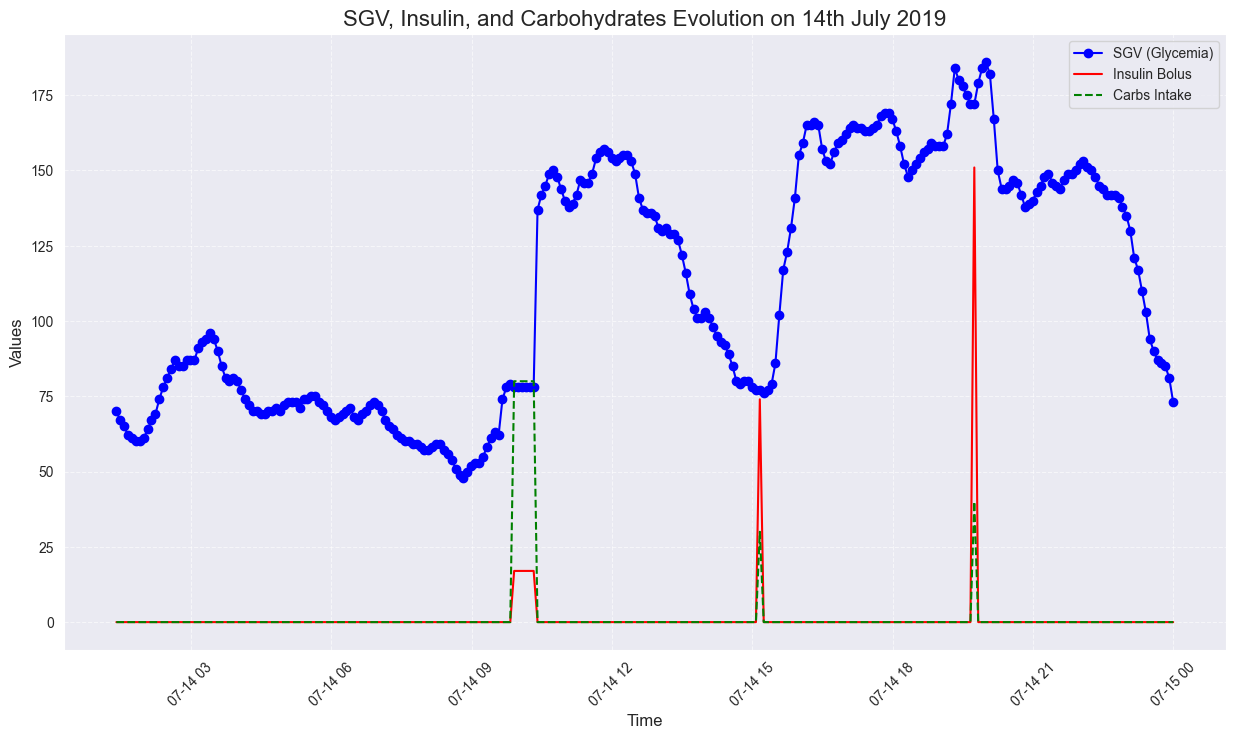

In [113]:
# Plot SGV evolution
plt.figure(figsize=(15, 8))
plt.plot(specific_date['dateString'], specific_date['glucose_combined'], label='SGV (Glycemia)', color='blue', marker='o')

# Plot Insulin Boluses (as a line plot)
plt.plot(specific_date['dateString'], specific_date['insulin'], label='Insulin Bolus', color='red', linestyle='-')

# Plot Carbohydrate Intakes (as bars)
plt.plot(specific_date['dateString'], specific_date['carbs'], label='Carbs Intake', color='green', linestyle='--')

# Add plot details
plt.title("SGV, Insulin, and Carbohydrates Evolution on 14th July 2019", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


#### We can definetly see that the insulin and carbs are related. The patient needs to inject insulin when he eats carbs. The time of the peaks in carbs and insulin are the same and they occured at: 
- 2019-07-14 09:51:59 (breakfast)
- 2019-07-14 15:07:59 (lunch)
- 2019-07-14 19:43:59 (dinner)

***
# Handling Wrong Values and Outliers

In [114]:
# In how many days does the dataset span?
days_span = (cleaned_data['dateString'].max() - cleaned_data['dateString'].min()).days
print(f"Days Span: {days_span}")

Days Span: 69


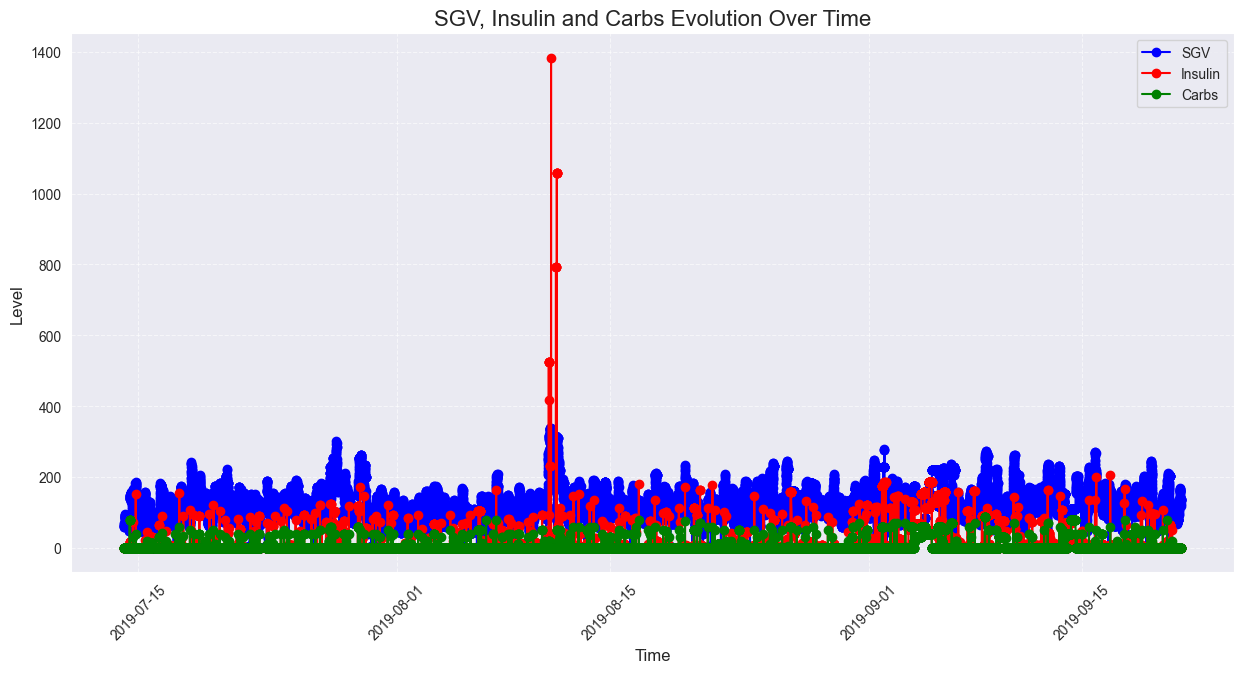

In [115]:
# Plot the glucose, insulin,svg, carbs levels over time
plt.figure(figsize=(15, 7))
plt.plot(cleaned_data['dateString'], cleaned_data['glucose_combined'], marker='o', color='blue', label='SGV')
plt.plot(cleaned_data['dateString'], cleaned_data['insulin'], marker='o', color='red', label='Insulin')
plt.plot(cleaned_data['dateString'], cleaned_data['carbs'], marker='o', color='green', label='Carbs')
    
# Add plot details
plt.title("SGV, Insulin and Carbs Evolution Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Level", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### There are significant outliers in the insulin values, with some values exceeding 500 units. These values are likely errors or outliers and should be considered for removal.

#### Removing Insulin Outliers where insulin is above 500

In [116]:
# Remove values in insulin above 500
cleaned_data_two = cleaned_data[cleaned_data['insulin'] <= 500]

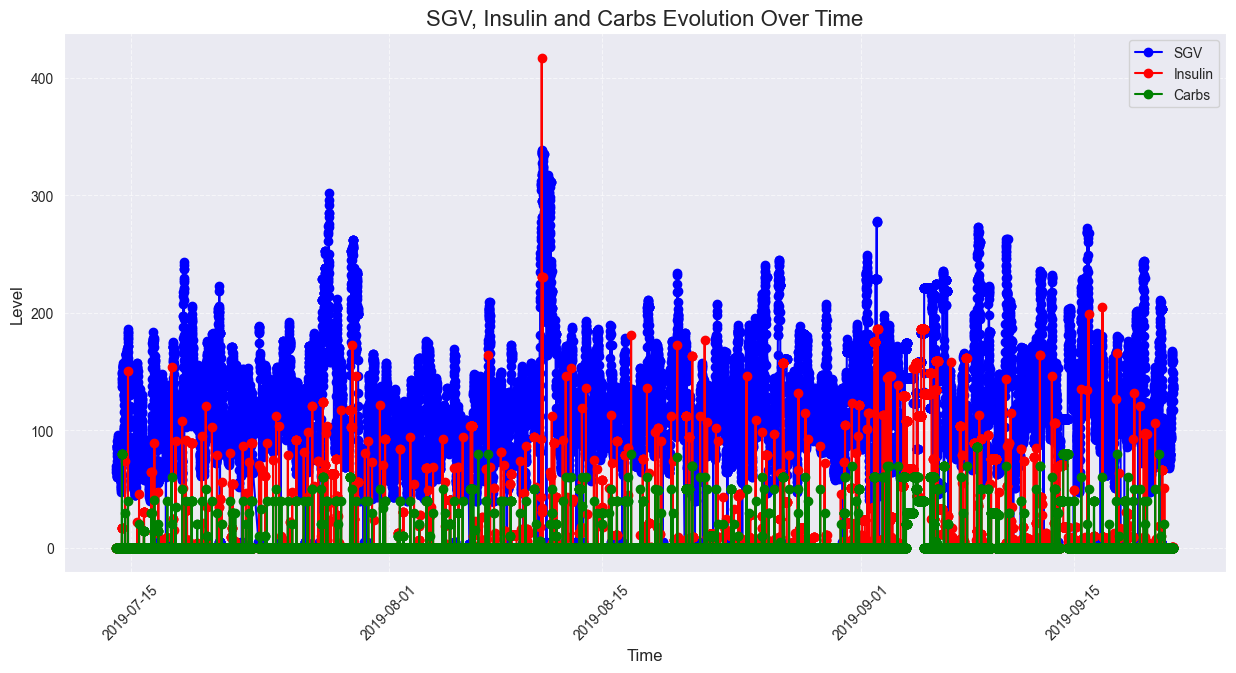

In [117]:
# Plot the glucose, insulin,svg, carbs levels over time
plt.figure(figsize=(15, 7))
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['glucose_combined'], marker='o', color='blue', label='SGV')
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['insulin'], marker='o', color='red', label='Insulin')
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['carbs'], marker='o', color='green', label='Carbs')

# Add plot details
plt.title("SGV, Insulin and Carbs Evolution Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Level", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### Inspecting for Outliers in Glucose Levels

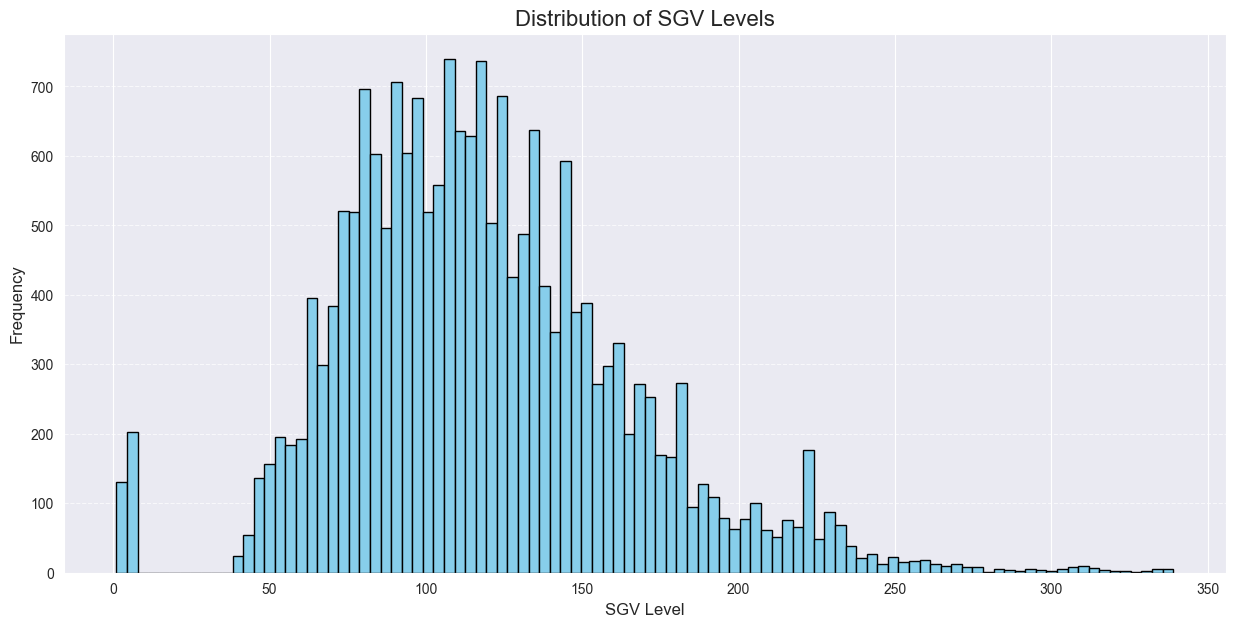

In [118]:
# Plot svg with a histogram
plt.figure(figsize=(15, 7))
plt.hist(cleaned_data_two['glucose_combined'].dropna(), bins=100, color='skyblue', edgecolor='black')

# Add plot details
plt.title("Distribution of SGV Levels", fontsize=16)
plt.xlabel("SGV Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Removing Glucose Outliers where glucose is below 20

In [119]:
# Drop rows that have combined glucose levels below 20
cleaned_data_two = cleaned_data_two[cleaned_data_two['glucose_combined'] >= 20]

#### Checking the results

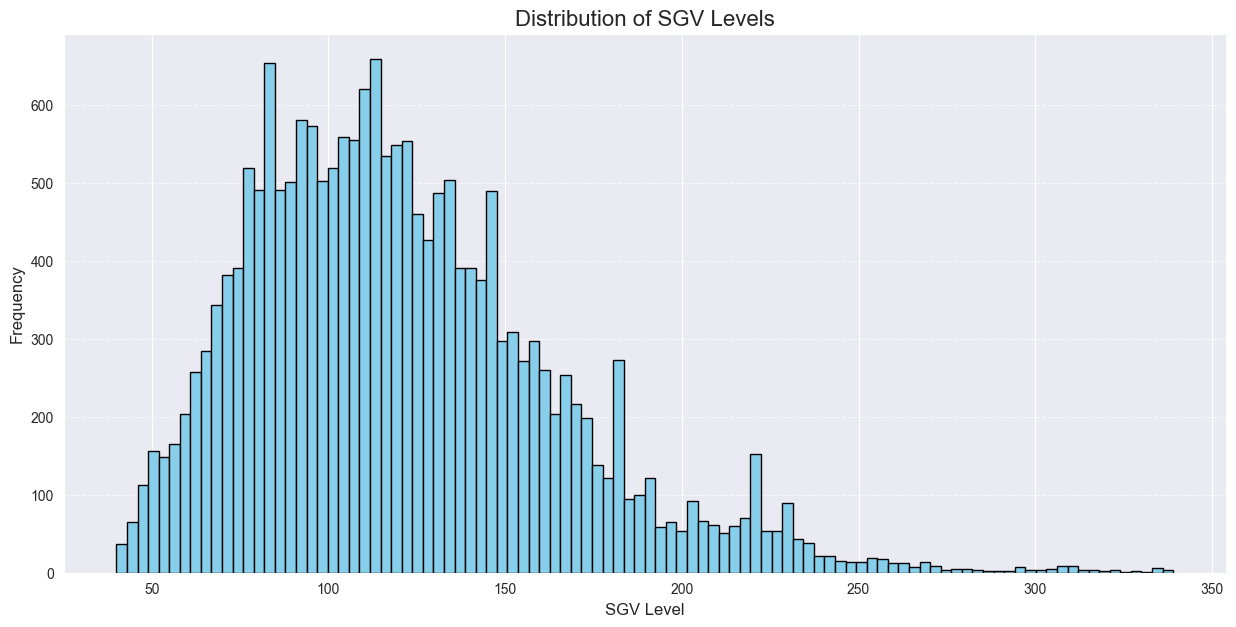

In [120]:
# Plot svg with a histogram
plt.figure(figsize=(15, 7))
plt.hist(cleaned_data_two['glucose_combined'].dropna(), bins=100, color='skyblue', edgecolor='black')

# Add plot details
plt.title("Distribution of SGV Levels", fontsize=16)
plt.xlabel("SGV Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***
# Inspecting for Missing Values

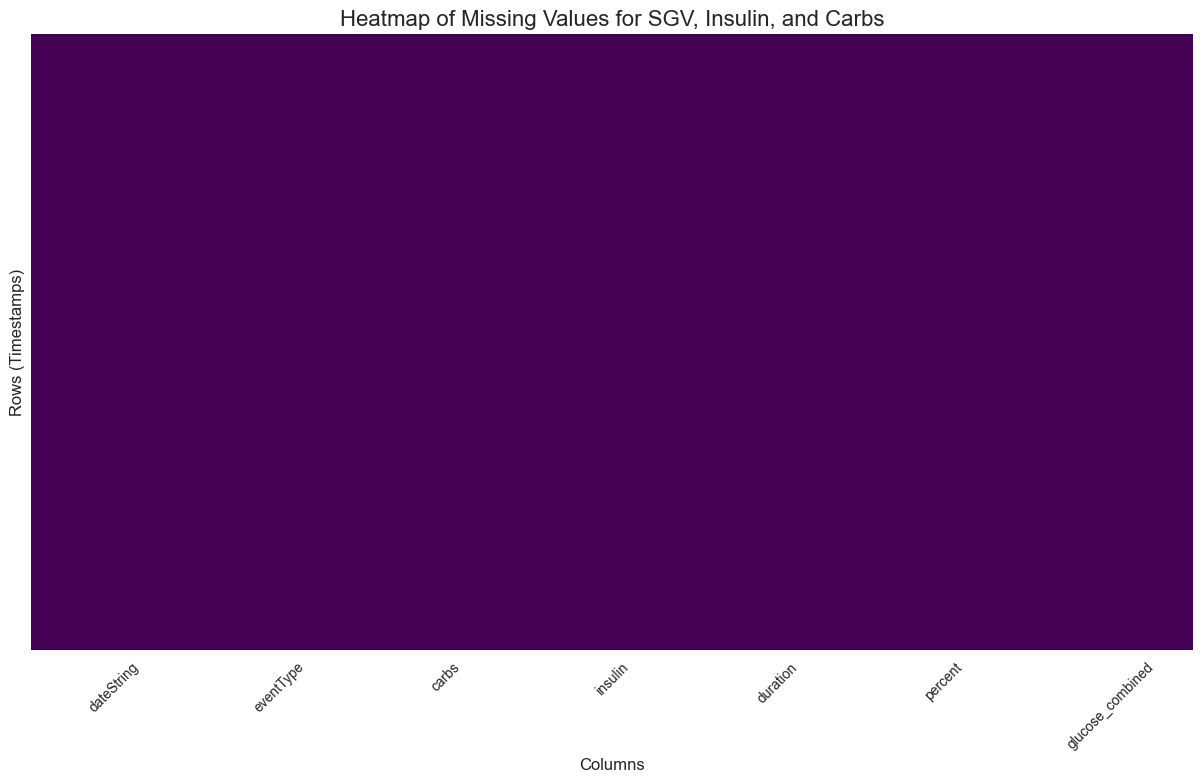

In [121]:
# Create a boolean DataFrame where True represents missing values
missing_data = cleaned_data_two.isnull()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values for SGV, Insulin, and Carbs", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows (Timestamps)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### there are no missing values in the dataset

In [122]:
cleaned_data_two.shape

(19340, 7)

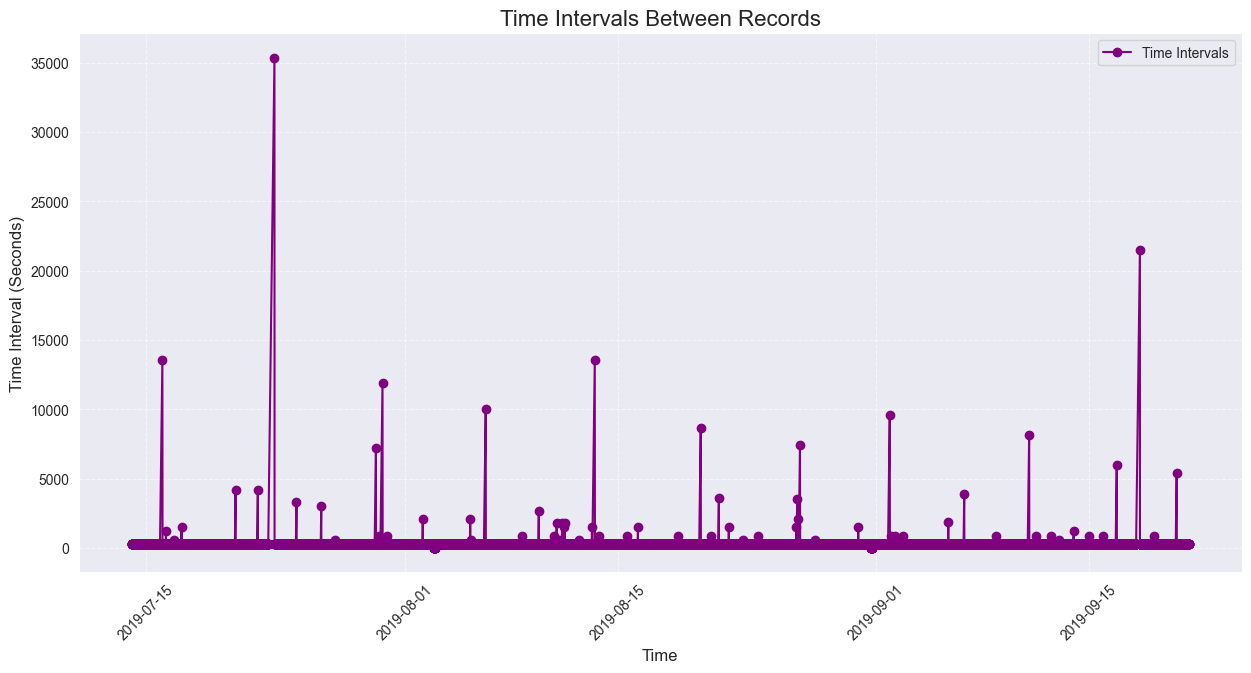

In [123]:
# Calculate the time intervals between records
cleaned_data_two['time_diff'] = pd.to_datetime(cleaned_data_two['dateString']).diff().dt.total_seconds()

# Plot the time intervals between records
plt.figure(figsize=(15, 7))
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['time_diff'], marker='o', color='purple', label='Time Intervals')

# Add plot details
plt.title("Time Intervals Between Records", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Time Interval (Seconds)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### The high time intervals between observations are duo to the fact that at this moments the cgm system is being calibrated. The time intervals are very high because the patient is not using the cgm system. On average the time intervals are around 5 minutes.

***
# Interpolating Missing Values (Filling Gaps in the time series)

In [128]:
# Ensure the DataFrame is sorted by time
cleaned_data_two = cleaned_data_two.sort_values('dateString').reset_index(drop=True)

# List to store new rows
new_rows = []

# Iterate through rows and check for gaps
for i in range(len(cleaned_data_two) - 1):
    current_row = cleaned_data_two.iloc[i]
    next_row = cleaned_data_two.iloc[i + 1]
    
    # Calculate the time difference
    current_time = pd.Timestamp(current_row['dateString'])
    next_time = pd.Timestamp(next_row['dateString'])
    time_diff = next_time - current_time
    
    # If the gap is greater than 5 minutes, insert intermediate rows
    if time_diff > timedelta(minutes=5):
        num_new_rows = round(time_diff.total_seconds() / 300) - 1  # Number of 5-min gaps
        
        for j in range(num_new_rows):
            new_time = current_time + timedelta(minutes=(j + 1) * 5)
            new_row = current_row.copy()  # Copy current row
            
            # Update the timestamp for the new row
            new_row['dateString'] = new_time
            
            # Set values for interpolated columns (e.g., glucose_combined, insulin, carbs)
            new_row['glucose_combined'] = None
            new_row['insulin'] = None
            new_row['carbs'] = None
            
            new_rows.append(new_row)

# Append new rows to the DataFrame
cleaned_data_two = pd.concat([cleaned_data_two, pd.DataFrame(new_rows)], ignore_index=True)

# Sort again after adding new rows
cleaned_data_two = cleaned_data_two.sort_values('dateString').reset_index(drop=True)

# Interpolate numerical columns
cleaned_data_two['glucose_combined'] = cleaned_data_two['glucose_combined'].interpolate(method='linear').ffill().bfill()
cleaned_data_two['insulin'] = cleaned_data_two['insulin'].interpolate(method='linear').ffill().bfill()
cleaned_data_two['carbs'] = cleaned_data_two['carbs'].fillna(0)  # Assume no carbs intake during gaps

# Verify time intervals
cleaned_data_two['time_diff'] = pd.to_datetime(cleaned_data_two['dateString']).diff().dt.total_seconds()

# Display the columns
cleaned_data_two.columns


Index(['dateString', 'eventType', 'carbs', 'insulin', 'duration', 'percent',
       'glucose_combined', 'time_diff'],
      dtype='object')

In [129]:
# Check for NA values
cleaned_data_two.dtypes

dateString          datetime64[ns]
eventType                   object
carbs                      float64
insulin                    float64
duration                   float64
percent                    float64
glucose_combined           float64
time_diff                  float64
dtype: object

In [130]:
cleaned_data_two.head()

,dateString,eventType,carbs,insulin,duration,percent,glucose_combined,time_diff
0,2019-07-14 01:24:38,Temp Basal,0.0,0.0,120.0,-100.0,70.0,NaN
1,2019-07-14 01:29:38,Temp Basal,0.0,0.0,120.0,-100.0,67.0,300.0
2,2019-07-14 01:34:38,Temp Basal,0.0,0.0,120.0,-100.0,65.0,300.0
3,2019-07-14 01:39:39,Temp Basal,0.0,0.0,120.0,-100.0,62.0,301.0
4,2019-07-14 01:44:38,Temp Basal,0.0,0.0,120.0,-100.0,61.0,299.0


## Check the time intervals

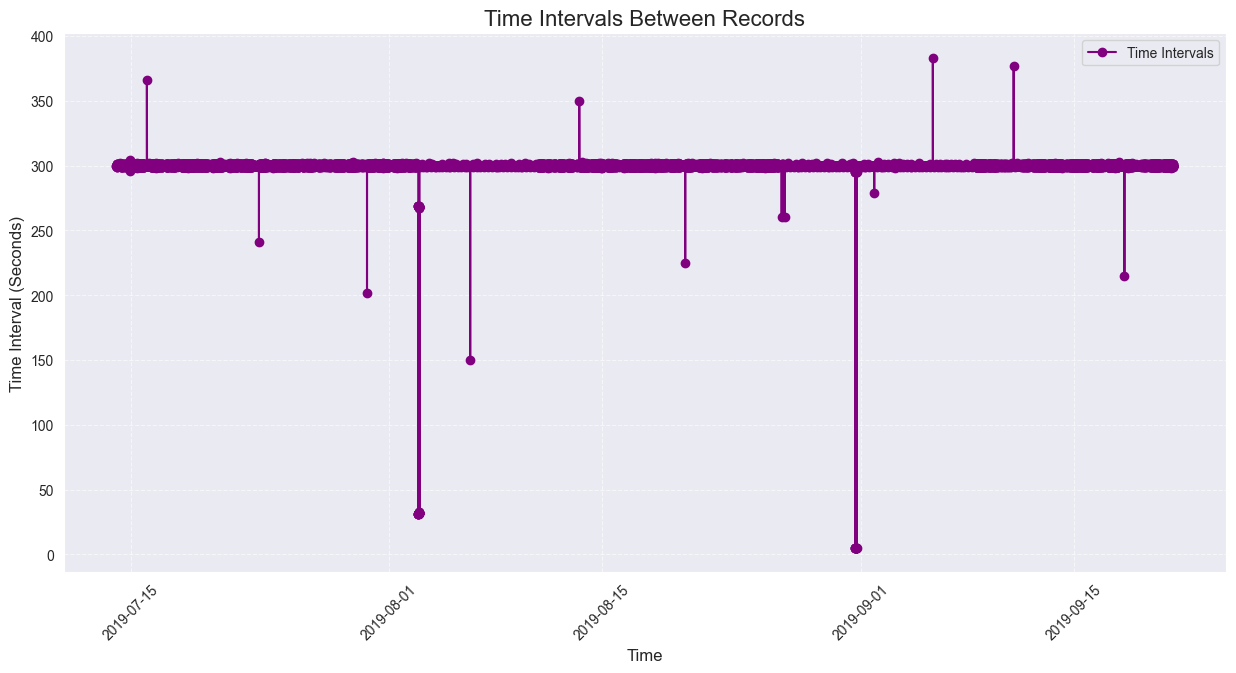

In [131]:
# Plot the time intervals to ensure uniformity
plt.figure(figsize=(15, 7))
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['time_diff'], marker='o', color='purple', label='Time Intervals')

# Add plot details
plt.title("Time Intervals Between Records", fontsize=16)
plt.xlabel("Time", fontsize=12)

plt.ylabel("Time Interval (Seconds)", fontsize=12)
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

#### Now you can see that the time intervals are almost aroung 5 minutes with some exceeding 5 minutes with some seconds and other are below 5 minutes. The values below 5 minutes can be caused by duplicate values in the dataset or moments where the system recorded multiple events in the same 5 minutes interval.

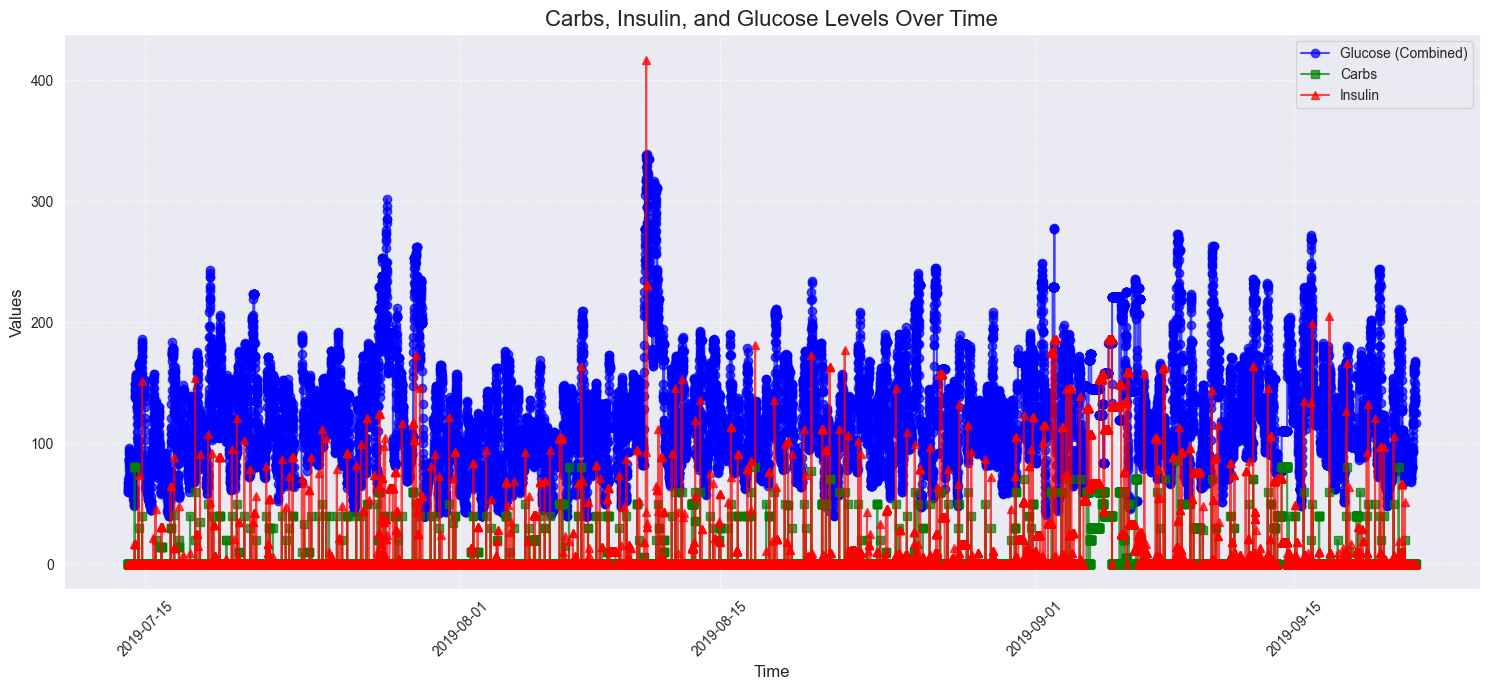

In [132]:
# Plot carbs, insulin, and glucose_combined over time
plt.figure(figsize=(15, 7))

# Plot glucose_combined
plt.plot(
    cleaned_data_two['dateString'], 
    cleaned_data_two['glucose_combined'], 
    label='Glucose (Combined)', 
    color='blue', 
    marker='o', 
    alpha=0.7
)

# Plot carbs
plt.plot(
    cleaned_data_two['dateString'], 
    cleaned_data_two['carbs'], 
    label='Carbs', 
    color='green', 
    marker='s', 
    alpha=0.7
)

# Plot insulin
plt.plot(
    cleaned_data_two['dateString'], 
    cleaned_data_two['insulin'], 
    label='Insulin', 
    color='red', 
    marker='^', 
    alpha=0.7
)

# Add plot details
plt.title("Carbs, Insulin, and Glucose Levels Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


***
# Creating 5-Minute Intervals for Insulin and Carbs

In [133]:
# Initialize insulin and carbs columns in cleaned_data_two
cleaned_data_two['insulin_5min'] = 0.0
cleaned_data_two['basal_insulin_5min'] = 0.0
cleaned_data_two['carbs_5min'] = 0.0

# Distribute Insulin Boluses
for index, row in cleaned_data_two.iterrows():
    if row['insulin'] > 0:
        # Distribute insulin over 60 intervals (5 hours)
        for t in range(1, 61):
            next_index = index + t
            if next_index < len(cleaned_data_two):
                cleaned_data_two.at[next_index, 'insulin_5min'] += row['insulin'] / 60

# Calculate Basal Insulin
daily_basal_units = 40  # Example: 40 units per day
basal_unit_per_5min = daily_basal_units / (24 * 12)  # 5-min intervals in 24 hours

for index, row in cleaned_data_two.iterrows():
    if not np.isnan(row['percent']) and row['duration'] > 0:
        basal_adjusted = basal_unit_per_5min * (row['percent'] / 100)
        intervals = int(row['duration'] / 5)
        for t in range(intervals):
            next_index = index + t
            if next_index < len(cleaned_data_two):
                cleaned_data_two.at[next_index, 'basal_insulin_5min'] += basal_adjusted
    else:
        cleaned_data_two.at[index, 'basal_insulin_5min'] = basal_unit_per_5min

# Distribute Carbs
for index, row in cleaned_data_two.iterrows():
    if row['carbs'] > 0:
        for t in range(1, 61):
            next_index = index + t
            if next_index < len(cleaned_data_two):
                cleaned_data_two.at[next_index, 'carbs_5min'] += row['carbs'] / 60

# Combine Insulin (Bolus + Basal)
cleaned_data_two['insulin_total_5min'] = cleaned_data_two['insulin_5min'] + cleaned_data_two['basal_insulin_5min']


***
# Plot Glucose, Insulin, and Carbs Evolution

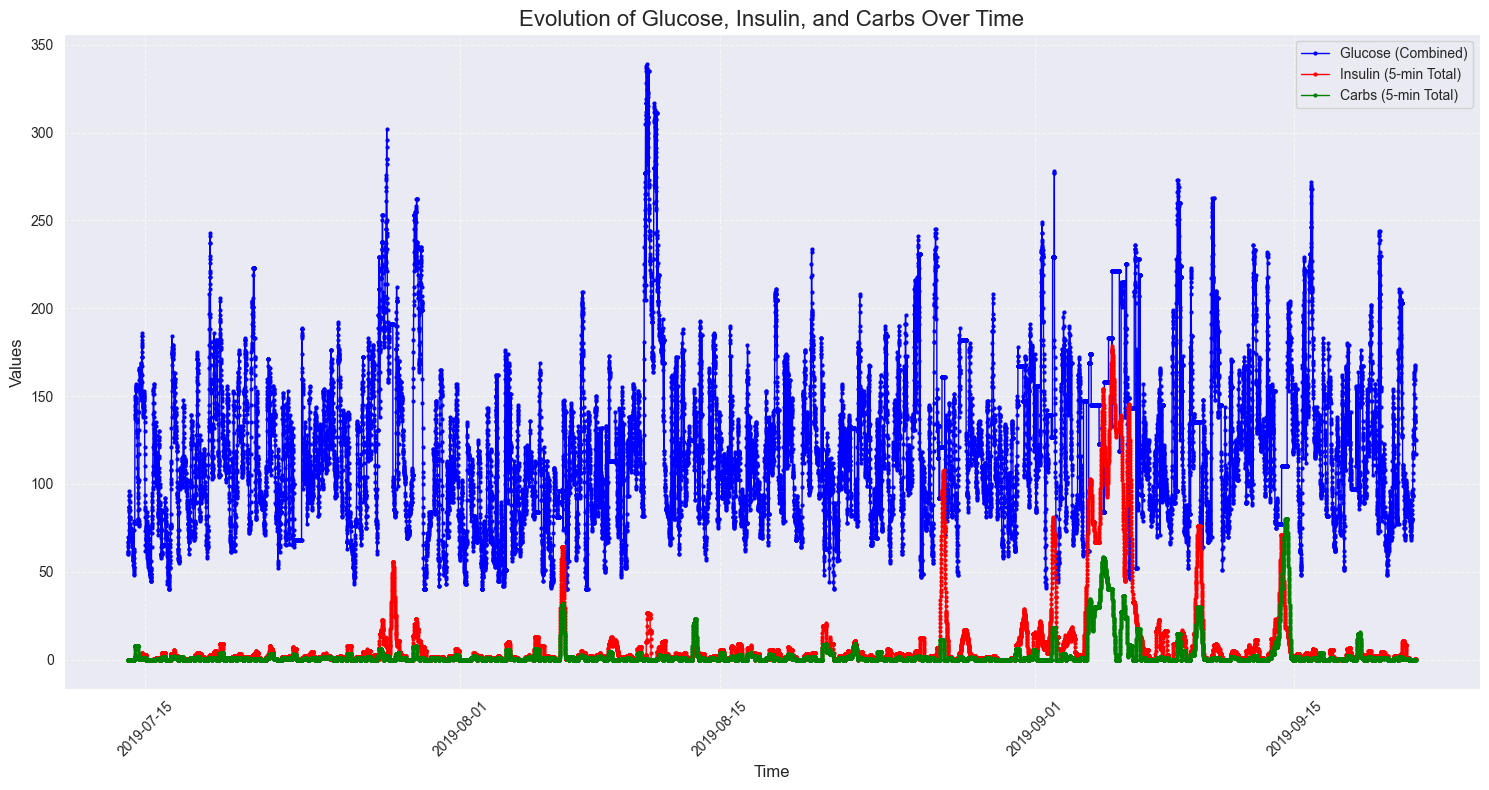

In [134]:
# Plot Glucose, Insulin, and Carbs Evolution
plt.figure(figsize=(15, 8))

# Plot Glucose
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['glucose_combined'], 
         label='Glucose (Combined)', color='blue', marker='o', markersize=2, linewidth=1)

# Plot Insulin
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['insulin_5min'], 
         label='Insulin (5-min Total)', color='red', marker='o', markersize=2, linewidth=1)

# Plot Carbs
plt.plot(cleaned_data_two['dateString'], cleaned_data_two['carbs_5min'], 
         label='Carbs (5-min Total)', color='green', marker='o', markersize=2, linewidth=1)

# Add plot details
plt.title("Evolution of Glucose, Insulin, and Carbs Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [135]:
# Drop columns created_at and time_diff
cleaned_data_two = cleaned_data_two.drop(columns=['time_diff', 'percent'], axis=1)

In [582]:
# Save the cleaned dataset
cleaned_data_two.to_csv('/Users/borisivanov/Documents/GitHub/insulinMLinjection/data/processed_data/cleaned_data.csv', index=False)

In [136]:
cleaned_data_two.columns

Index(['dateString', 'eventType', 'carbs', 'insulin', 'duration',
       'glucose_combined', 'insulin_5min', 'basal_insulin_5min', 'carbs_5min',
       'insulin_total_5min'],
      dtype='object')